<a href="https://colab.research.google.com/github/madhanmohans/Cross-Site-Scripting-Detection/blob/main/XSS_detection_%7C_Phase_1_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ytimport pandas as pd
import io
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/XSSDataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Space,Contains Break Line,Class,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,1,1,1,0,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,0,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,1,1,1,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:, ~df.columns.str.match('Unnamed')]

In [ ]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Underscore,Contains location,Contains Search,Contains &#,Contains Open Brace,Contains Close Brace,Contains tilde,Contains Space,Contains Break Line,Class
0,1,1,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
1,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
2,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
3,1,1,1,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
4,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious


In [ ]:
pd.isnull(df).sum()

Contains &lt                  2
Contains &rt                  2
Contains Script               2
Contains And                  2
Contains Percentage           2
Contains BackSlash            2
Contains Plus                 2
Contains Document             2
Contains Onerror              2
Contains DIV                  2
Contains iframe               2
Contains img                  2
Contains SRC                  2
Contains Var                  2
Contains Eval                 2
Contains href                 2
Contains Cookie               2
Contains Single Quote         2
Contains Question Mark        2
Contains Exclamation Mark     2
Contains HTTPS                2
Contains JS                   2
Contains Hash                 2
Contains Equal                2
Contains Open Parenthesis     2
Contains Close Parenthesis    2
Contains Asterisk             2
Contains Comma                2
Contains Hyphen               2
Contains At                   2
Contains Underscore           2
Contains

In [ ]:
df = df.dropna()

In [ ]:
pd.isnull(df).sum()

Contains &lt                  0
Contains &rt                  0
Contains Script               0
Contains And                  0
Contains Percentage           0
Contains BackSlash            0
Contains Plus                 0
Contains Document             0
Contains Onerror              0
Contains DIV                  0
Contains iframe               0
Contains img                  0
Contains SRC                  0
Contains Var                  0
Contains Eval                 0
Contains href                 0
Contains Cookie               0
Contains Single Quote         0
Contains Question Mark        0
Contains Exclamation Mark     0
Contains HTTPS                0
Contains JS                   0
Contains Hash                 0
Contains Equal                0
Contains Open Parenthesis     0
Contains Close Parenthesis    0
Contains Asterisk             0
Contains Comma                0
Contains Hyphen               0
Contains At                   0
Contains Underscore           0
Contains

In [ ]:
df['Class'].unique()

array(['Malicious', 'Benign', '1'], dtype=object)

In [ ]:
df.drop(df[(df['Class'] == '1')].index, inplace=True)

In [ ]:
df['Class'].unique()

array(['Malicious', 'Benign'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class']) 

In [ ]:
df['Class'].unique()

array([1, 0])

In [ ]:
df['Contains &rt'].unique()

array([1, 0, '0', '1', '#ERROR!'], dtype=object)

In [ ]:
for column in df:
  df.drop(df[(df[column] == '#ERROR!')].index, inplace=True)

In [ ]:
for column in df.loc[:, df.columns != 'Class']:
  df[column] = df[column].astype(int)

In [ ]:
df['Contains &rt'].unique()

array([1, 0])

In [ ]:
array = df.values

X = array[0:,0:39]
Y = array[:,39]
Y=Y.astype('int')

In [ ]:
print(X)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]


In [ ]:
print(Y)

[1 1 1 ... 1 1 1]


In [ ]:
print(X.dtype)

int64


In [ ]:
print(Y.dtype)

int64


In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(X,Y)
print(mi_scores)
mi_scores.size

[2.34693074e-01 2.34162894e-01 3.72986811e-01 4.95756718e-03
 6.16923020e-02 3.62919668e-05 1.10683987e-02 7.19667795e-02
 6.33191697e-03 5.49709500e-04 1.21532774e-02 7.28916229e-03
 3.22662104e-02 9.22373127e-03 3.35069199e-03 0.00000000e+00
 8.22827719e-02 2.45295585e-03 2.26300263e-01 2.29165645e-02
 4.47814634e-03 9.31037646e-03 2.37945530e-04 7.06770691e-02
 1.20270105e-01 1.18989994e-01 6.32649177e-03 6.02612012e-02
 4.31061761e-02 1.59000363e-03 3.94067064e-02 2.47919464e-02
 7.80934437e-02 0.00000000e+00 6.01211715e-03 3.95212051e-03
 0.00000000e+00 5.22176361e-02 4.03920770e-02]


39

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy' 
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.968133 (0.058996)
LDA: 0.956771 (0.067610)
KNN: 0.963527 (0.081091)
CART: 0.925758 (0.126886)
NB: 0.935365 (0.106971)
SVM: 0.931498 (0.116604)


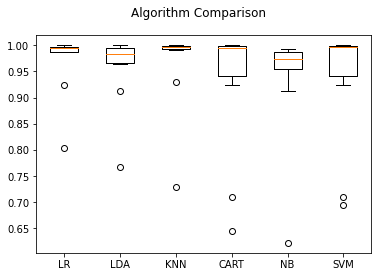

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()